OBJECTIVE: In this Part 02 of the HW4, we will focus on advanced techniques such as regularization in the Logistic Regression classification algorithm."


# Part I: Load Dataset and Explore (Total: 06)

1) Load in the dataset `student.csv` into a pandas dataframe

In [20]:
import pandas as pd
import numpy as np
data = pd.read_csv('student.csv', index_col=0)
data.head()

,default,student,balance,income
1,No,No,729.526495,44361.625074
2,No,Yes,817.180407,12106.134700
3,No,No,1073.549164,31767.138947
4,No,No,529.250605,35704.493935
5,No,No,785.655883,38463.495879


2) Apply One-Hot Encoding: Convert `default` and `student` to categorical variables. (2 pts)

In [23]:
#convert default and student into categorical variables - use built-in one-hot encoding


#YOUR CODE
data =

# DONT MODIFY BELOW CODE
data = data.drop('default_No', axis=1)
data = data.drop('student_No', axis=1)


data.head()

3) 3.1. Make boxplots of all of the variables and a scatter plot of of (balance,income) with the color
of the outcome of `default` labeled red if yes and blue if no.  (2 pts)

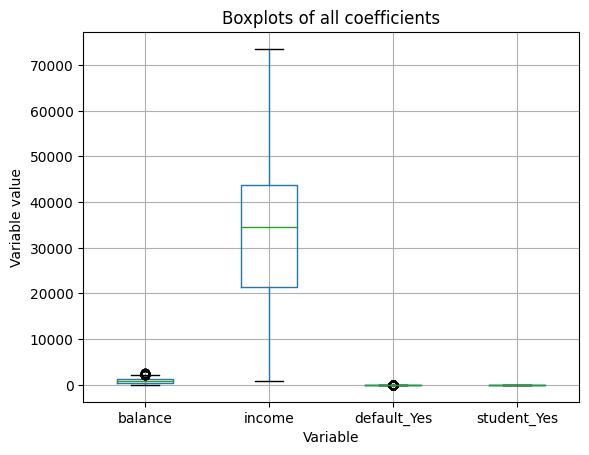

In [ ]:
#make boxplots of all variables
import matplotlib.pyplot as plt




3) 3.2. make scatter plot of (balance, income) with color of point labeled red if default is yes, blue if no. (2 pts)

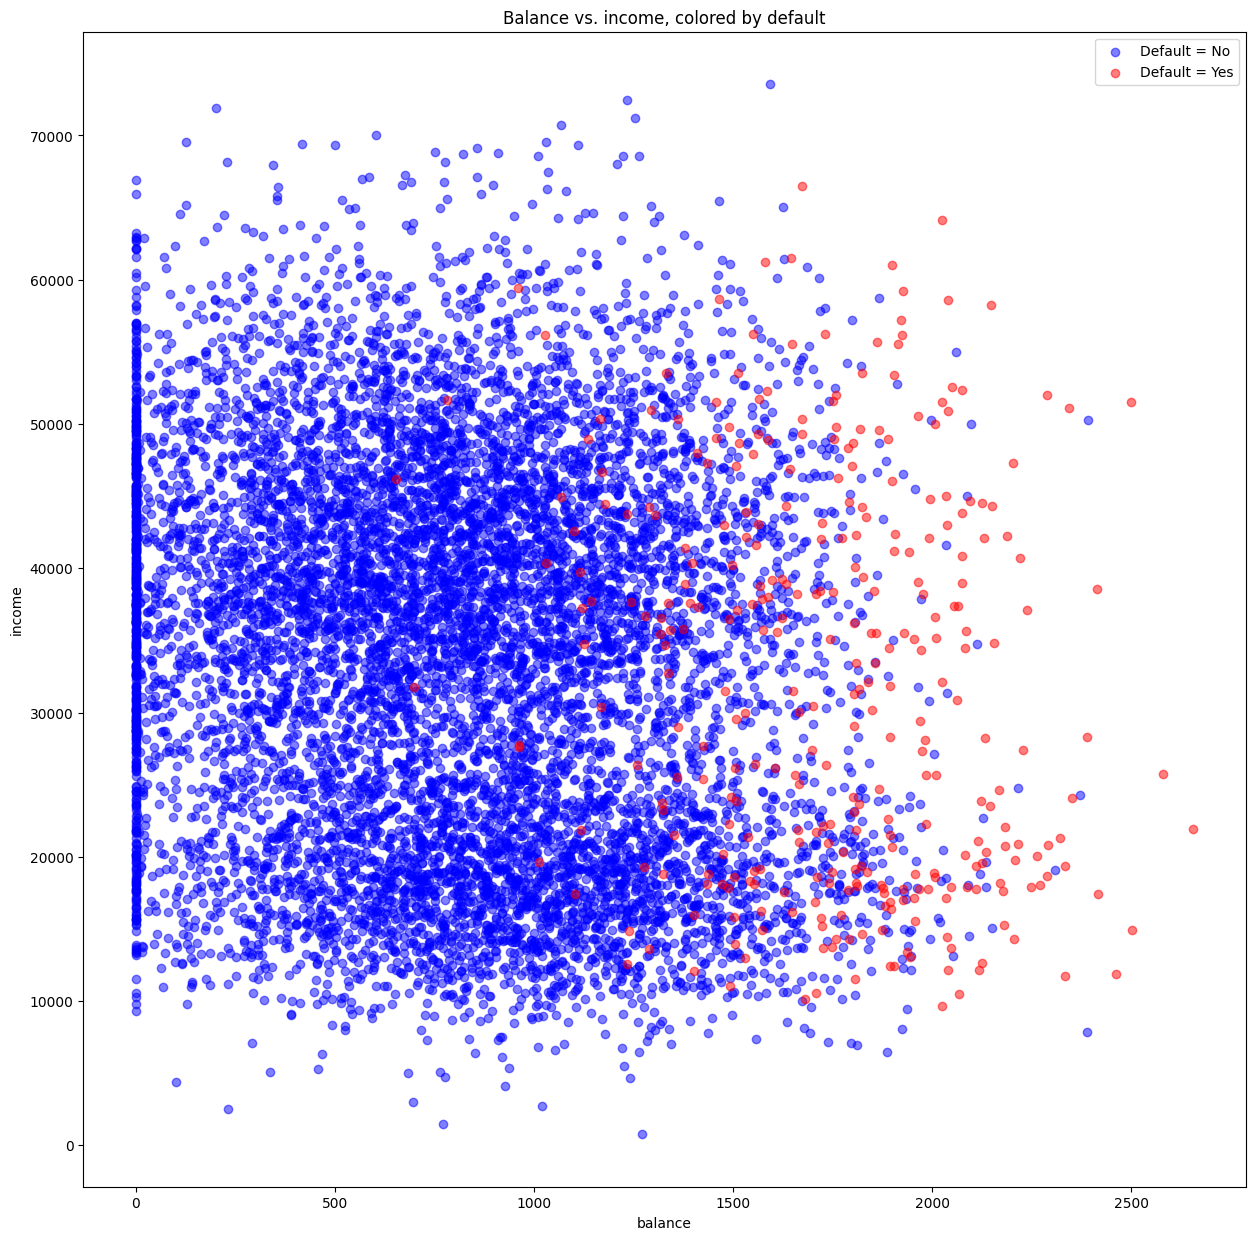

In [ ]:
#make scatter plot of (balance, income) with color of point labeled red if default is yes, blue if no

#YOUR CODE




plt.xlabel('balance')
plt.ylabel('income')
plt.title('Balance vs. income, colored by default')
plt.legend()
plt.show()

# Part II: Train a Logistic Regression Model  (Total: 22)

4.1) Train a model to predict if a student defaults on their loan or not using LogisticRegression based soley
on the `balance` and `income` variables. Add "penalty='l2'" while creating object for LogisticRegression. (pts: 06)

In [ ]:
import sklearn
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

#only student data
student_data = data[data['student_Yes']==1]

X = student_data[['balance', 'income']]
y = student_data['default_Yes']

#use train/test split

#YOUR CODE

#train Logistic Regression model using penalty='l2'

#YOUR CODE

#make predictions on testing

#YOUR CODE

4.2) Plot the decision boundary in the scatter plot you made in 3)(pts: 03).

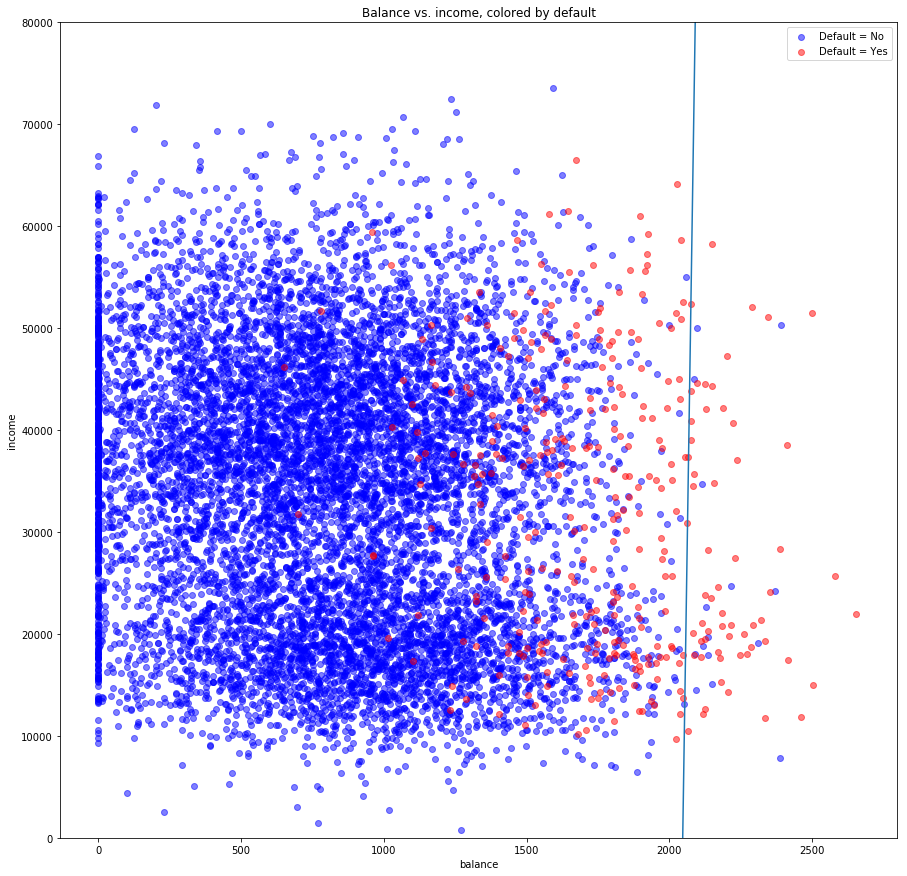

In [ ]:
#plot decision boundary - specify line

#calculate slope and intercept

#YOUR CODE


#DONE MODIFY BELOW CODE
x_points = np.linspace(1500, 2600, 2000)
y_points = slope*x_points - intercept

#make scatter plot of (balance, income) with color of point labeled red if default is yes, blue if no

# your code


plt.ylim(0, 80000)
plt.xlabel('balance')
plt.ylabel('income')
plt.title('Balance vs. income, colored by default')
plt.legend()
plt.show()

4.3) Now, compute the AUC ROC and plot it. (pts: 03)

In [ ]:
#function for plotting ROC - DONT MODIFY CODE
def generate_ROCplot(fpr,tpr,label,roc_auc):
    plt.clf()
    plt.plot(fpr, tpr, '.-',label='ROC curve (area = %0.2f)' % roc_auc)
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.0])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic')
    plt.legend(loc="lower right")
    plt.show()

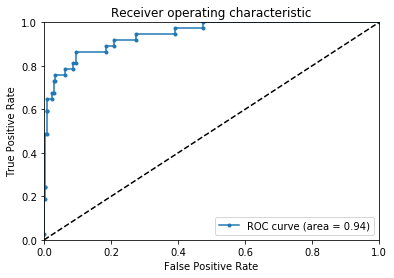

In [ ]:
import sklearn.metrics
from sklearn.metrics import roc_curve, auc

# Generate ROC for LR with l2 penalty



# Plots ROC
generate_ROCplot(fpr,tpr,'LR',roc_auc)

5) Repeat 4) [4.1 to 4.3] but with the student variable included. (pts: 10)

In [ ]:
X = data[['balance', 'income', 'student_Yes']]
y = data['default_Yes']

#use train/test split

# your code

#train model

# your code

#make predictions on testing

# your code

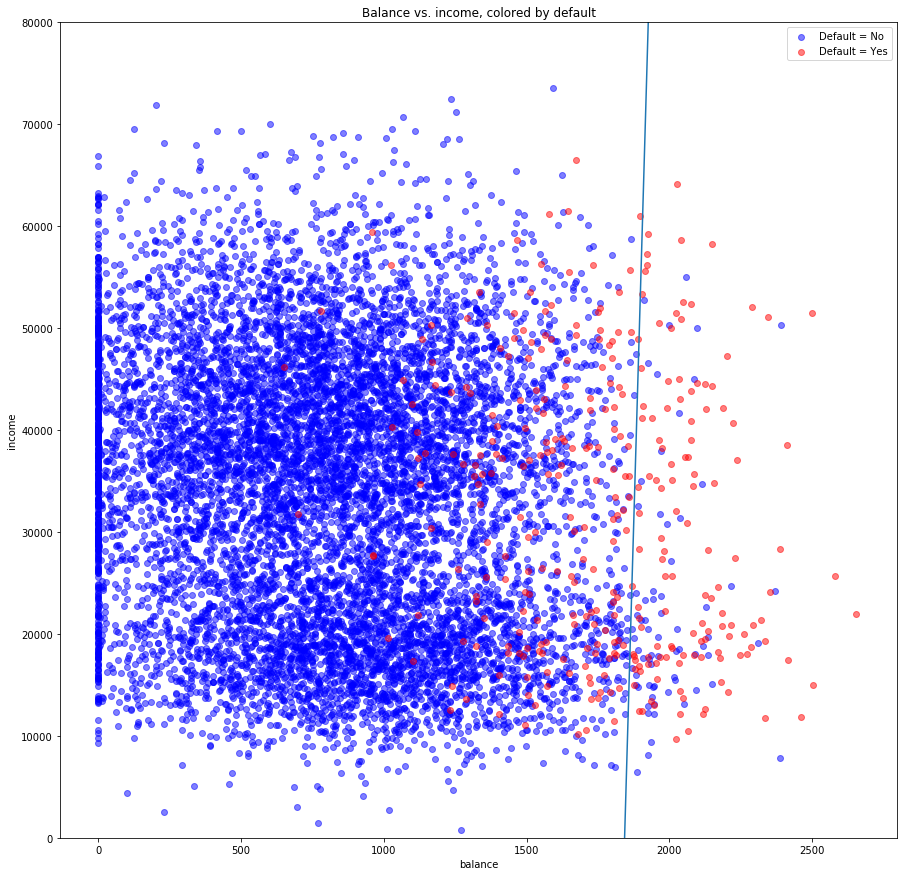

In [ ]:
#plot decision boundary - specify line

# your code

#DONT MODIFY BELOW CODE

x_points = np.linspace(1500, 2600, 2000)
y_points = slope*x_points - intercept

#make scatter plot of (balance, income) with color of point labeled red if default is yes, blue if no

# your code

plt.xlabel('balance')
plt.ylabel('income')
plt.title('Balance vs. income, colored by default')
plt.legend()
plt.show()

Area under the ROC curve : 0.941712


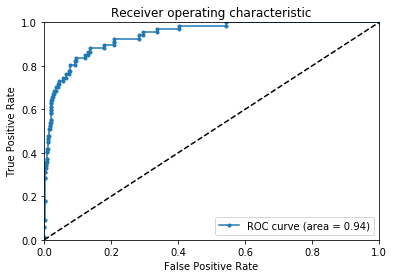

In [ ]:
#compute AUC ROC
import sklearn.metrics
from sklearn.metrics import roc_curve, auc

#compute ROC

# your code

# Generate ROC  for LR with l2 penalty

# your code
print("Area under the ROC curve : %f" % roc_auc)

# Plots ROC
generate_ROCplot(fpr,tpr,'LR',roc_auc)

We observe that the performance remains stable with the addition of a new variable, as indicated by our AUC ROC consistently hovering around 0.95.

#Part 03: Explore Regularization Strengths  (Total: 12)

Next, we will apply Ridge regularization (L2 penalty) with varying strengths to further evaluate our model.

6) (5 pts)
* We will explore different regularization strengths using the 'C' values. The C value controls the strength of the regularization: smaller values of C imply stronger regularization (more penalty), while larger values allow the model to fit the training data more closely (less penalty).

* Add "penalty='l2'" and "C" Value while creating object for LogisticRegression.






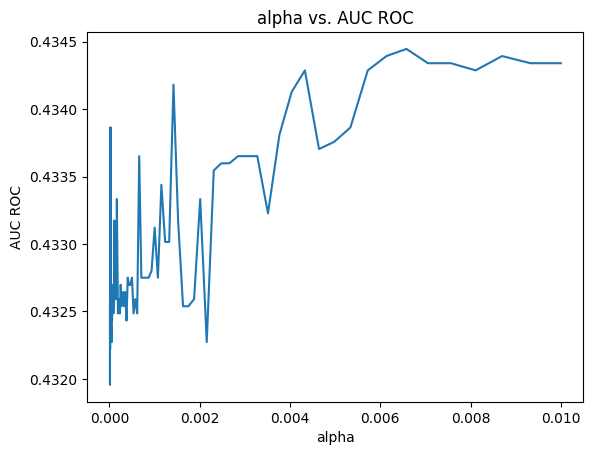

Optimal C value for logistic regression: 0.006579332246575682


In [ ]:
from sklearn.metrics import roc_curve, auc
#optimize using ridge regression - incorporate L2 penalty into logistic regression

# Define a range of regularization strengths (C values)
C_vals = np.logspace(-5,-2,100)

scores = []

#scale data - to find feature importance down below
from sklearn.preprocessing import StandardScaler

X_scaled = # your code

X_train, X_test, y_train, y_test = # your code (use random state=7)

# Loop through each C value to evaluate model performance
for C_val in C_vals:


    # Initialize logistic regression model with L2 penalty (Ridge regression) using the current C value
    regr = #your code

    # Fit the model to the training data
    regr.fit(X_train, y_train)

    # Predict probabilities for the test set
    probas_ = #your code

    # Calculate the false positive rate (fpr), true positive rate (tpr), and thresholds for ROC curve
    fpr, tpr, thresholds = #your code

    # Compute the area under the ROC curve (AUC)
    roc_auc = auc() # modify this  code

    # Append the AUC score to the scores list for later analysis
    scores.append(roc_auc)

#plot alphas vs. scores
plt.plot(C_vals, scores)
plt.xlabel('alpha')
plt.ylabel('AUC ROC')
plt.title('alpha vs. AUC ROC')
plt.show()

C_best = #your code
print('Optimal C value for logistic regression: ' + str(C_best))

6) Now, compute the coefficients of the logistic regression model using the optimal C value that your have found.  (3 pts)

In [23]:
#compute coefficients - Fit the model on the training data and calculate coefficients
regr = #your code
regr.fit(X_train,y_train)
coeffs = np.array() #modify this code

#Next sort and plot coefficients
# Use Matplotlib to create a bar chart displaying the labels and values of these top coefficients.

# sort the coefficients
coeffs = #your code
#plot
plt.bar(np.array([0,1,2]), coeffs[0])
plt.xlabel('Coefficient label')
plt.xticks(np.array([0,1,2]), X.columns.values)
plt.ylabel('Coefficient value')
plt.title('Top coefficients')
plt.show()
coeffs

Questions  (2 pts): Which coefficient is the most important for predicting the outcome: balance, income, or student_Yes? Check from above plot.


ANSWER:  

7) Final Part, now, using 5 fold cross validation, check that the logistic regression model you built in using penalty l2 and optimal C value is robust (generalizes to other random folds of the dataset).  (2 pts)

In [23]:
#can also use built in sklearn function
from sklearn.model_selection import cross_val_score

# cross validation
regr = # your code, use optimal c value and penalty l2 for initialization of LogisticRegression object
regr.fit(X_train, y_train)

scores = cross_val_score(, scoring='roc_auc') # modify this code
print(scores)
plt.bar(range(1,6),scores)
plt.title('AUC ROC for each fold in 5-fold CV')
plt.xlabel('Fold number')
plt.ylabel('AUC ROC')
plt.show()

What observations can you make about the model's ability to generalize to random subsets of the data, considering the AUC ROC scores?  (2 pts)

Answer:

# ------------ THE END --------------